### Dcunha_PO11015_FinalProject_05_16_2024

# Predicting Medical Insurance Charges

**Objective:** Develop a predictive model for estimating medical insurance charges based on individual characteristics to assist insurance companies in pricing insurance policies accurately.

**Stakeholders:** Insurance companies, policyholders seeking medical insurance coverage.

**Data Features:** Age, sex, BMI (Body Mass Index), number of children, smoker status, region, and medical insurance charges (target variable).

**Use Cases:** Risk assessment, premium calculation, customer segmentation.

**Performance Metrics:** Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R2) score.

Understanding these aspects guides the data analysis and modeling process, ensuring that the developed model addresses specific business needs and provides actionable insights for stakeholders.

## Import all libraries and dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
 

## Reading the dataset

Source: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

In [4]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Cleaning

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Check data types of each column
data_types = df.dtypes
print("\nData types:\n", data_types)


Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


No missing value found

## Exploratory Analysis

### Histograms of Numerical Variables

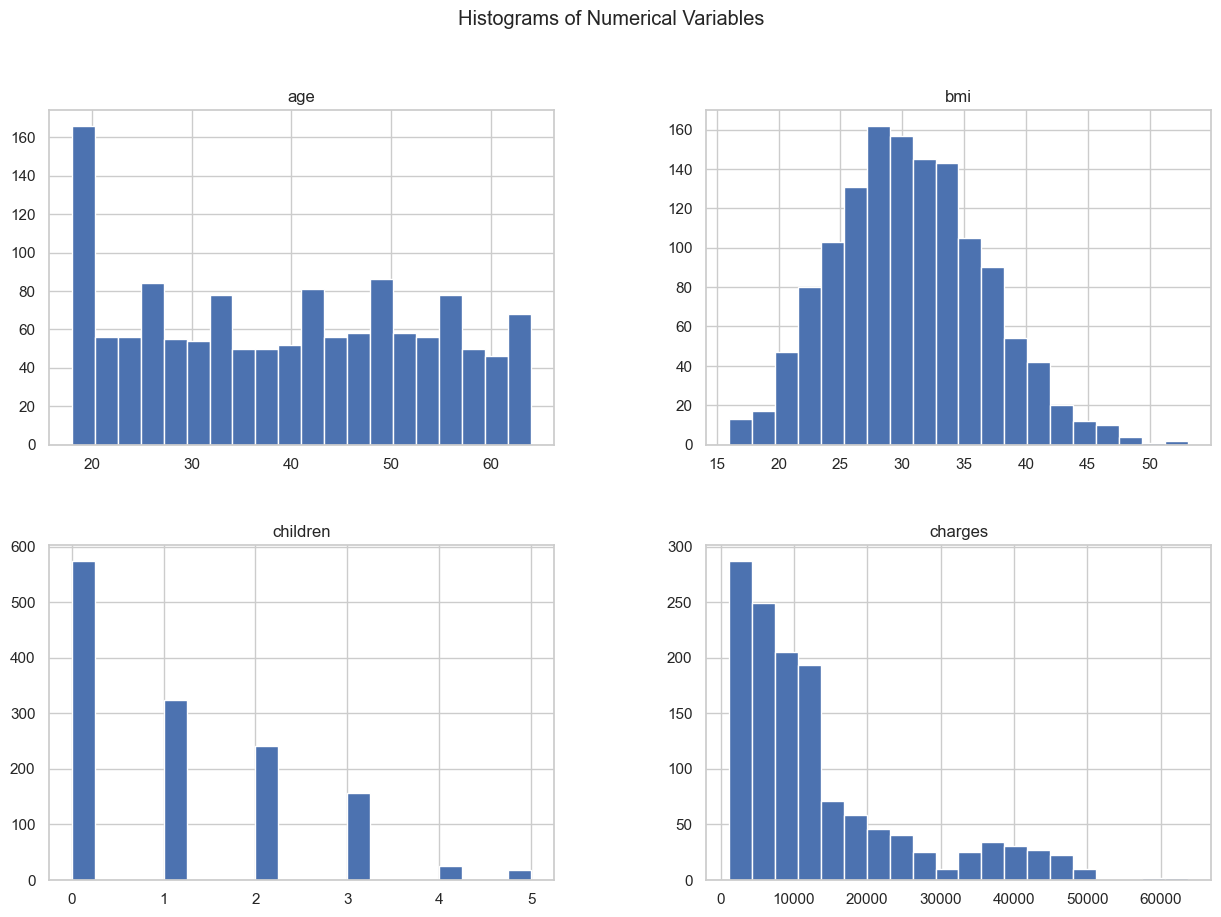

In [20]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histograms for numerical variables
numerical_features = ["age", "bmi", "children", "charges"]
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 2))
plt.suptitle("Histograms of Numerical Variables")
plt.show()


### Boxplots

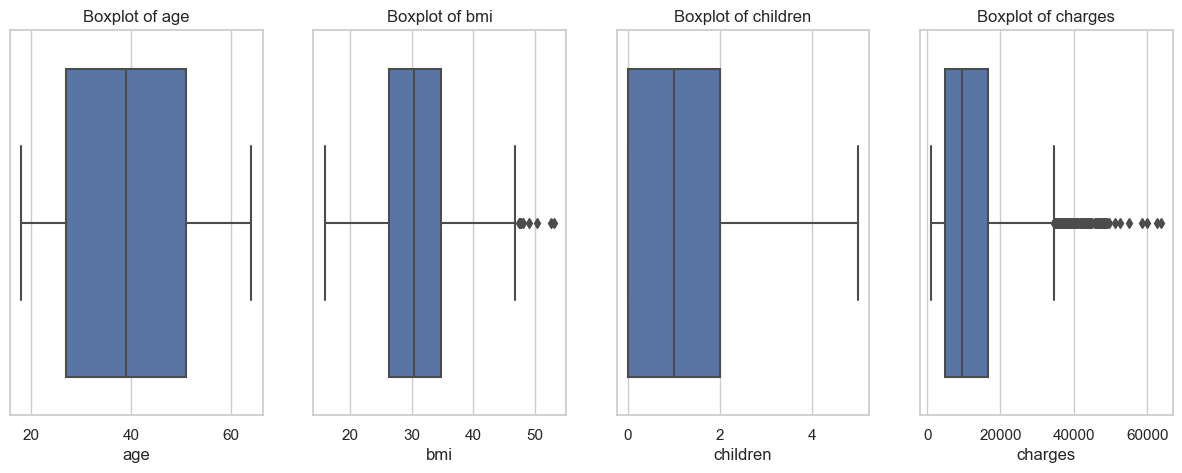

In [21]:
# Plot box plots for numerical variables
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.show()

* Age Distribution:
    * The “Boxplot of age” shows a fairly symmetrical distribution of ages.
    * The majority of individuals fall between approximately 20 to 60 years old.
    * The median age (the line inside the box) is around 40 years.
    * There are no extreme outliers in this distribution.
* BMI (Body Mass Index):
    * The “Boxplot of bmi” reveals the distribution of BMI values.
    * Most data points cluster between approximately 20 to 40 BMI units.
    * Some outliers exist beyond 40 BMI units, indicating individuals with higher BMI.
    * The median BMI is around 30.
* Number of Children:
    * The “Boxplot of children” represents the distribution of the number of children.
    * The data is skewed toward fewer children.
    * Many individuals have no children or only one child.
    * Fewer data points are associated with having more than two children.
* Medical Charges:
    * The “Boxplot of charges” displays the distribution of medical charges.
    * It is highly skewed to the right, indicating that most people incur lower charges.
    * However, there are significant outliers with very high charges.
    * Understanding these outliers and their underlying factors could be crucial for healthcare cost management.

### Visualization Of Categorical Features

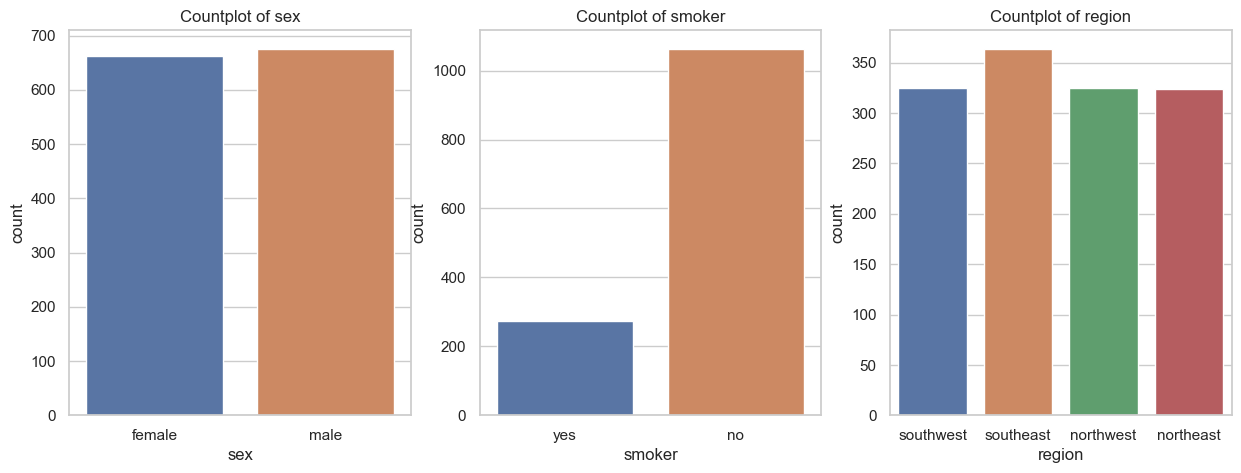

In [23]:
# Plot count plots for categorical variables
categorical_features = ["sex", "smoker", "region"]
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[feature])
    plt.title(f"Countplot of {feature}")
plt.show()

## Data Preprocessing

### Encoding

In [12]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### Standardization

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select numerical features for scaling
numerical_features = ["age", "bmi", "children"]

# Apply standardization to numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first few rows of the scaled dataset
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False


 ## Split Dataset for Training and Testing

In [17]:
# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop("charges", axis=1)  # Features
y = df_encoded["charges"]              # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (1070, 8) (1070,)
Testing set shape (X, y): (268, 8) (268,)


## Modelling

In [18]:
# Initialize the linear regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 33596915.85136149
Mean Absolute Error (MAE): 4181.194473753652
R-squared (R2) Score: 0.7835929767120722


* Mean Squared Error (MSE): The MSE value is approximately 33,596,915.85. This means, on average, the squared difference between the actual and predicted charges is around 33,596,915.85. Lower MSE values indicate better model performance, so this value suggests that there is some room for improvement in predicting the charges.

* Mean Absolute Error (MAE): The MAE value is approximately 4,181.19. This means, on average, the absolute difference between the actual and predicted charges is around 4,181.19. Similarly to MSE, lower MAE values indicate better model performance.

* R-squared (R2) Score: The R-squared score is approximately 0.784. This indicates that around 78.4% of the variance in the target variable (charges) is predictable from the features included in the model. A higher R-squared value closer to 1 suggests a better fit of the model to the data.

Overall, these metrics suggest that the linear regression model provides a decent fit to the data, but there might be room for improvement, especially in reducing the mean squared error and mean absolute error. You can explore additional techniques such as feature engineering, trying different regression algorithms, or hyperparameter tuning to potentially improve the model's performance further.

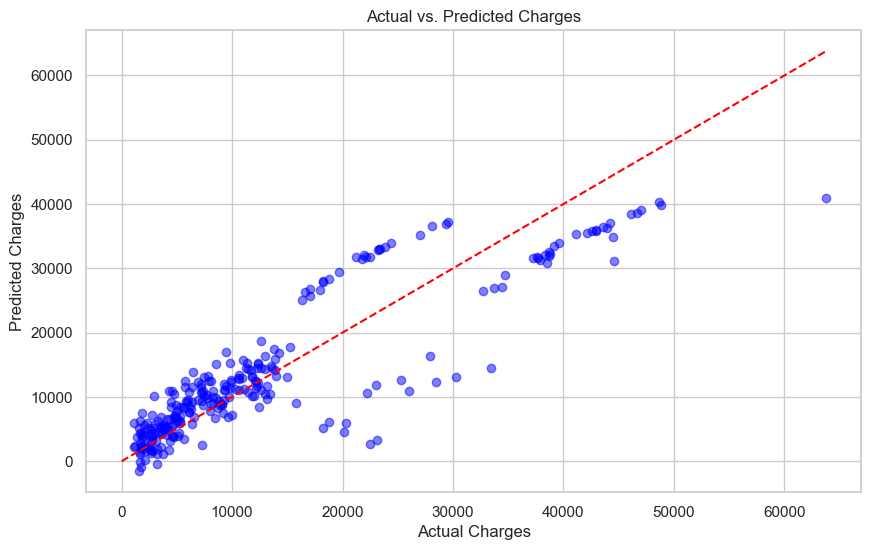

In [24]:

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(np.linspace(0, np.max(y_test), 100), np.linspace(0, np.max(y_test), 100), color='red', linestyle='--')
plt.title('Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()


* Accuracy at Lower Charges: The model seems to perform well for lower charge values, as indicated by the concentration of blue dots around the red dashed line, which represents perfect prediction accuracy.
* Deviation at Higher Charges: There is a visible deviation from the red dashed line as the actual charges increase, suggesting that the model’s predictions become less accurate for higher charge amounts.
* Overall Model Performance: The general clustering of data points around the red dashed line for lower charges indicates that the model has a good predictive performance in this range. However, the spread of points away from the line at higher charges could be an area to investigate and improve the model’s accuracy.
* Potential Improvements: To enhance the model, one might consider additional data, feature engineering, or different modeling techniques to better capture the relationship between actual and predicted charges, especially for higher values.

In [32]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,0.412467,-0.900341,0.751079,False,False,False,False,False
887,-0.228344,-0.105546,-0.908614,False,False,True,False,False
890,1.765289,-0.619825,-0.908614,False,True,True,False,False
1293,0.483668,-0.806836,1.580926,True,False,True,False,False
259,-1.438764,0.206139,-0.908614,True,True,True,False,False
...,...,...,...,...,...,...,...,...
109,1.694088,0.726160,-0.908614,True,True,False,True,False
575,1.338082,-0.573072,-0.908614,False,False,True,False,False
535,-0.085942,-0.432814,-0.078767,True,False,False,False,False
543,1.053277,2.747188,-0.908614,False,True,False,True,False


## Demonstration

In [39]:
# Define the characteristics of the individual
sample_individual = {
    'age': 35,
    'bmi': 27.5,
    'children': 2,
    'sex_male': 1,  # Assuming male
    'smoker_yes': 1,  # Assuming non-smoker
    'region_northwest': 0,  # Assuming southeast region
    'region_southeast': 1,
    'region_southwest': 0
}

# Convert the individual's characteristics into a DataFrame
sample_df = pd.DataFrame(sample_individual, index=[0])

# Scale numerical features using the same scaler from model training
#sample_df_scaled = scaler.transform(sample_df)

# Predict medical insurance charges for the sample individual
predicted_charges = linear_reg.predict(sample_df)

print("Predicted Medical Insurance Charges:", predicted_charges[0])


Predicted Medical Insurance Charges: 215775.26747714583
